## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Dibuje el diagrama Pert y determine el camino crítico.
> 2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.
>
> 3. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 periodos con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.
>
> 4. Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios. ¿Se encuentra bien nivelado el recurso “mano de obra”?. ¿Se encuentra bien asignado este recurso?. En ambos casos explicar el porqué; y en caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.

In [122]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, desviacion, cur,   recursos, duracion_tope
  (   'A',      '---  ',      3,         1,        25,       3,        2    ),
  (   'B',      '---  ',      1,         1,        20,       1,        1    ),
  (   'C',      '---  ',      2,         1,         7,       6,        1    ),
  (   'D',      '---  ',      1,         1,        25,       1,        1    ),
  (   'E',      'A,B  ',      3,         2,        10,       2,        2    ),
  (   'F',      'B,C  ',      5,         1,        25,       5,        3    ),
  (   'G',      'C,D  ',      1,         1,        30,       2,        1    ),
  (   'H',      'E    ',      1,         1,         5,       5,        1    ),
  (   'I',      'G    ',      3,         1,        50,       3,        2    ),
  (   'J',      'F,H,I',      2,         1,        15,      10,        1    ),
  (   'K',      'G    ',      1,         1,        10,       5,        1    ),
] ,columns=['actividad', 'precedentes', 'duracion', 'desviacion', 'cur', 'recursos', 'duracion_tope']).set_index('actividad')

datos_enunciado

,precedentes,duracion,desviacion,cur,recursos,duracion_tope
actividad,,,,,,
A,---,3,1,25,3,2
B,---,1,1,20,1,1
C,---,2,1,7,6,1
D,---,1,1,25,1,1
E,"A,B",3,2,10,2,2
F,"B,C",5,1,25,5,3
G,"C,D",1,1,30,2,1
H,E,1,1,5,5,1
I,G,3,1,50,3,2


## Solución
### Apartado 1

> Dibuje el diagrama Pert y determine el camino crítico.




En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [123]:
from pmule import GrafoProyecto

La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [124]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A',         1,           2     ),
  (  'B',         1,           3     ),
  (  'C',         1,           4     ),
  (  'D',         1,           5     ),
  (  'E',         2,           6     ),
  (  'F',         7,           9     ),
  (  'G',         5,           8     ),
  (  'H',         6,           9     ),
  (  'I',         8,           9     ),
  (  'J',         9,          10     ),
  (  'K',         8,          10     ),
  (  'f1',        3,           2     ),
  (  'f2',        3,           7     ),
  (  'f3',        4,           7     ), 
  (  'f4',        4,           5     ), 
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,desviacion,cur,recursos,duracion_tope,nodo_inicial,nodo_final
actividad,,,,,,,,
A,---,3.0,1.0,25.0,3.0,2.0,1,2
B,---,1.0,1.0,20.0,1.0,1.0,1,3
C,---,2.0,1.0,7.0,6.0,1.0,1,4
D,---,1.0,1.0,25.0,1.0,1.0,1,5
E,"A,B",3.0,2.0,10.0,2.0,2.0,2,6
F,"B,C",5.0,1.0,25.0,5.0,3.0,7,9
G,"C,D",1.0,1.0,30.0,2.0,1.0,5,8
H,E,1.0,1.0,5.0,5.0,1.0,6,9
I,G,3.0,1.0,50.0,3.0,2.0,8,9


In [125]:
proyecto = GrafoProyecto(datos_proyecto)

#### Grafo PERT con numeración de nodos

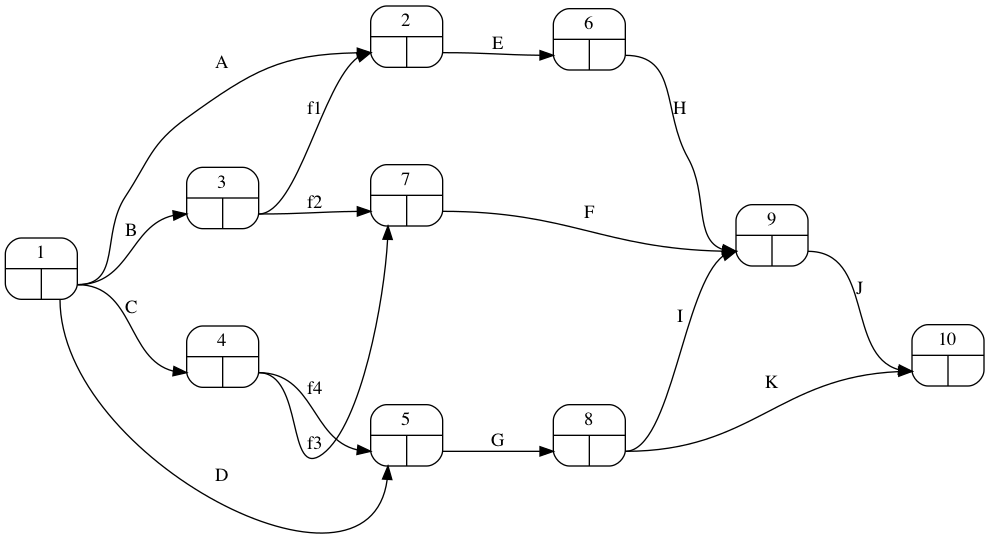

In [126]:
proyecto.pert(filename='pert_nodos.png',
              duraciones=None,
              orientation='portrait', ranksep=1, nodesep=1)

##### Matriz de Zaderenko 

In [127]:
zaderenko = proyecto.zaderenko(datos_proyecto['duracion'])
zaderenko

,1,2,3,4,5,6,7,8,9,10,temprano
1,,3,1,2,1,,,,,,0
2,,,,,,3,,,,,3
3,,0,,,,,0,,,,1
4,,,,,0,,0,,,,2
5,,,,,,,,1,,,2
6,,,,,,,,,1,,6
7,,,,,,,,,5,,2
8,,,,,,,,,3,1,3
9,,,,,,,,,,2,7
10,,,,,,,,,,,9


In [128]:
resultados_pert = proyecto.calcula_pert(duraciones=datos_proyecto['duracion'])
resultados_pert['tiempos']

,tempranos,tardios
1,0.0,0.0
4,2.0,2.0
5,2.0,3.0
8,3.0,4.0
3,1.0,2.0
7,2.0,2.0
2,3.0,3.0
6,6.0,6.0
9,7.0,7.0
10,9.0,9.0


##### Holguras

In [129]:
resultados_pert['H_total']

A     0.0
B     1.0
C     0.0
D     2.0
E     0.0
f1    2.0
f2    1.0
f3    0.0
f4    1.0
G     1.0
H     0.0
F     0.0
I     1.0
K     5.0
J     0.0
dtype: float64

###### Camino crítico

In [130]:
camino_critico = proyecto.camino_critico(datos_proyecto['duracion'])
camino_critico

Index(['A', 'C', 'E', 'f3', 'H', 'F', 'J'], dtype='object')

##### Grafo PERT con indicación de tiempos

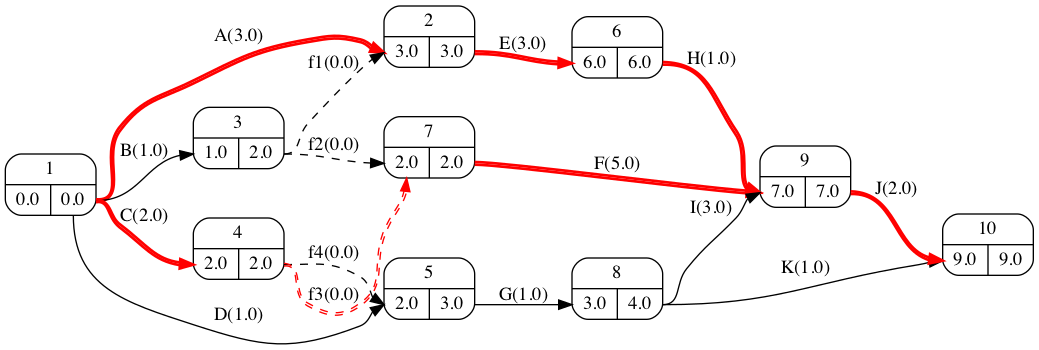

In [131]:
filename='pert_tiempos_apartado_1.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

### Apartado 2
> 2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.

La duración media del proyecto ya la tenemos calculada:

In [132]:
duracion_media_proyecto = proyecto.duracion_proyecto(duraciones=datos_proyecto['duracion'])
duracion_media_proyecto

9.0

Para determinar la desviación típica de la duración del proyecto debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor.

In [133]:
rama_A_E_H_J=['A', 'E', 'H', 'J']
desviacion_A_E_H_J = datos_proyecto.loc[rama_A_E_H_J, 'desviacion']
desviacion_A_E_H_J

actividad
A    1.0
E    2.0
H    1.0
J    1.0
Name: desviacion, dtype: float64

In [134]:
rama_C_f3_F_J=['C', 'f3', 'F', 'G']
desviacion_C_f3_F_J = datos_proyecto.loc[rama_C_f3_F_J, 'desviacion']
desviacion_C_f3_F_J

actividad
C     1.0
f3    0.0
F     1.0
G     1.0
Name: desviacion, dtype: float64

In [135]:
varianza_A_E_H_J =  (desviacion_A_E_H_J  ** 2).sum()
varianza_C_f3_F_J = (desviacion_C_f3_F_J ** 2).sum()
print('rama_A_E_H_J:', varianza_A_E_H_J )
print('rama_C_f3_F_J:', varianza_C_f3_F_J)

rama_A_E_H_J: 7.0
rama_C_f3_F_J: 3.0


In [136]:
varianza_proyecto = max(varianza_A_E_H_J, varianza_C_f3_F_J)
desviacion_proyecto = varianza_proyecto ** 0.5
desviacion_proyecto

2.6457513110645907

El proyecto sigue una distribución normal con media 9 y desviación típica 2.65.

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad:

In [137]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_12 = norm.cdf(12, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_10 = norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_entre_10_y_12 = probabilidad_de_terminar_antes_de_12 - probabilidad_de_terminar_antes_de_10
probabilidad_de_terminar_antes_de_10 * 100

64.72715069443633

In [138]:
probabilidad_de_terminar_antes_de_9 = norm.cdf(9, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_9 * 100

50.0

Este último valor era conocido por ser 9 la duración media del proyecto y corresponderle un 50% del área de la normal.

### Apartado 3. 

> Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 semana con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.


Se aborda la solución de este apartado mediante la récnica de reducción de la duración del proyecto con mínimo coste.

##### Situación inicial de partida

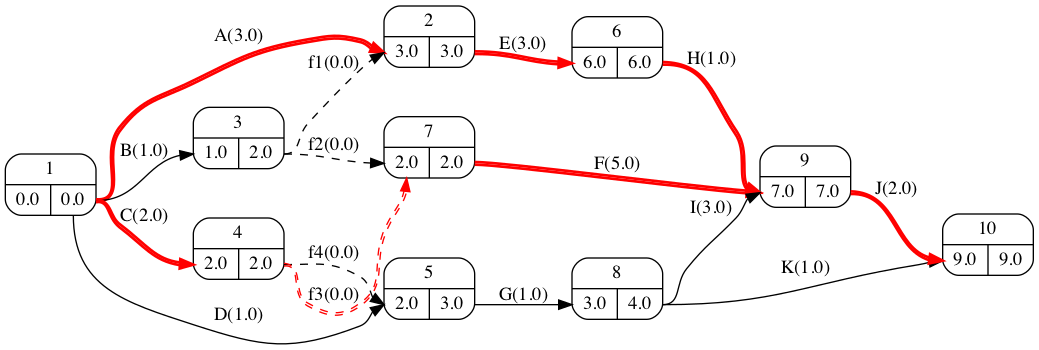

In [139]:
filename='pert_apartado_3_situacion_inicial.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Para analizar el efecto de la reducción de la duración usaremos una nueva matriz para almacenar los datos de las duraciones:


In [140]:
datos_proyecto_reduccion = datos_proyecto.copy()

##### Primera reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de cada tarea de las ramas críticas:

In [141]:
datos_proyecto_reduccion.loc[rama_A_E_H_J, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
H,5.0,1.0,1.0
E,10.0,3.0,2.0
J,15.0,2.0,1.0
A,25.0,3.0,2.0


En la rama A-E-H-J la actividad más barata es la H, pero ya está en su duración tope. La siguiente más barata es la E, que dispone de un periodo de reducción. 

In [142]:
datos_proyecto_reduccion.loc[rama_C_f3_F_J, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
f3,0.0,0.0,0.0
C,7.0,2.0,1.0
F,25.0,5.0,3.0
G,30.0,1.0,1.0


En la rama C-f3-F-J la actividad reducible más barata es la C.

Se propone reducir la E y la C. El coste asociado a tal reducción es:

In [143]:
datos_proyecto_reduccion.loc[['E', 'C'], 'cur'].sum()

17.0

In [144]:
datos_proyecto_reduccion.loc[['E', 'C'], 'duracion'] -=1

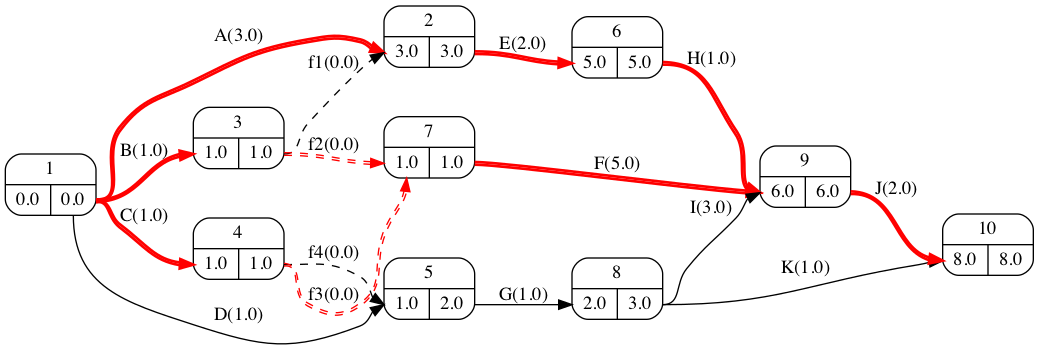

In [145]:
filename='pert_apartado_3_situacion_inicial.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

##### Segunda reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de cada tarea de las ramas críticas:

In [146]:
datos_proyecto_reduccion.loc[rama_A_E_H_J, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
H,5.0,1.0,1.0
E,10.0,2.0,2.0
J,15.0,2.0,1.0
A,25.0,3.0,2.0


En la rama A-E-H-J la actividad reducible más barata es la J. 

In [147]:
datos_proyecto_reduccion.loc[rama_C_f3_F_J, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
f3,0.0,0.0,0.0
C,7.0,1.0,1.0
F,25.0,5.0,3.0
G,30.0,1.0,1.0


En la rama C-f3-F-J la actividad reducible más barata es la F.

Se propone reducir la J y la F. El coste asociado a tal reducción es:

In [148]:
datos_proyecto_reduccion.loc[['F', 'J'], 'cur'].sum()

40.0

In [149]:
datos_proyecto_reduccion.loc[['F', 'J'], 'duracion'] -=1

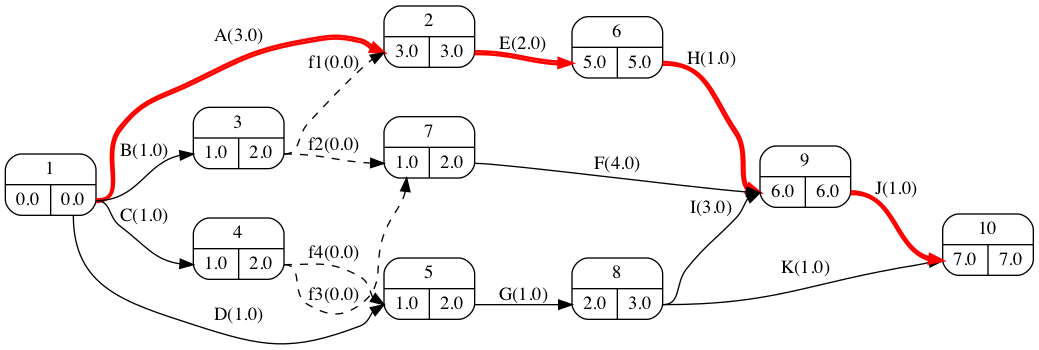

In [150]:
filename='pert_apartado_3_segunda_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

### Apartado 4

> Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios. ¿Se encuentra bien nivelado el recurso “mano de obra”?. ¿Se encuentra bien asignado este recurso?. En ambos casos explicar el porqué; y en caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.

Para analizar el efecto de la asignacion usaremos una nueva matriz para almacenar los datos de las duraciones:


In [151]:
datos_proyecto_asignacion = datos_proyecto.copy()

In [152]:
gantt_recursos = proyecto.gantt(duraciones=datos_proyecto_asignacion['duracion'],
                                representar=datos_proyecto_asignacion['recursos'],
                                total='fila',
                                holguras=True)
gantt_recursos

,1,2,3,4,5,6,7,8,9,H_total
A,3,3,3,,,,,,,0
B,1,,,,,,,,,1
C,6,6,,,,,,,,0
D,1,,,,,,,,,2
E,,,,2,2,2,,,,0
F,,,5,5,5,5,5,,,0
G,,,2,,,,,,,1
H,,,,,,,5,,,0
I,,,,3,3,3,,,,1
J,,,,,,,,10,10,0


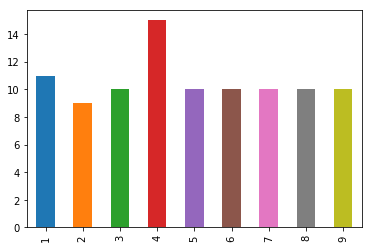

In [153]:
(gantt_recursos.data.loc['Total']
   .drop('H_total')
   .plot(kind='bar'));

La demanda del recurso no se encuentra nivelada.
Además, con el máximo disponible de 10 recursos durante los primeros 5 periodos el proyecto no es ejecutable en su estado actual y debe aplicarse el algoritmo de asignación.

### Algoritmo de asignación

##### Asignación en el Periodo 1:

Se propone desplazar la actividad D por ser la actividad no crítica con mayor holgura.

In [154]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto_asignacion['duracion'],
                                    actividades={'D': 1})

nuevo_gantt = desplazamiento['proyecto'].gantt(duraciones=desplazamiento['duraciones'],
                                               representar=datos_proyecto['recursos'],
                                               total='fila',
                                               holguras=True)
nuevo_gantt

,1,2,3,4,5,6,7,8,9,H_total
A,3,3,3,,,,,,,0
B,1,,,,,,,,,1
C,6,6,,,,,,,,0
D,,1,,,,,,,,1
E,,,,2,2,2,,,,0
F,,,5,5,5,5,5,,,0
G,,,2,,,,,,,1
H,,,,,,,5,,,0
I,,,,3,3,3,,,,1
J,,,,,,,,10,10,0


La actividad *slide_D* representa el desplazamiento de la tarea _D_. La siguiente gráfica representa la demanda de recursos tras este desplazamiento.

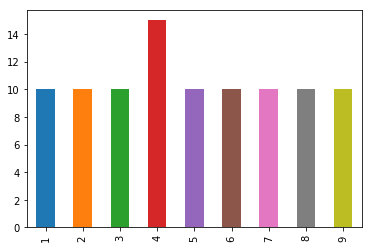

In [155]:
(nuevo_gantt
   .data
   .loc['Total']
   .drop('H_total')
   .plot(kind='bar'));

En esta situación el siguiente periodo problemático es el 4.

##### Asignación en el  Periodo 4:

Se propone desplazar la actividad K por ser la actividad no crítica con mayor holgura.

In [156]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto_asignacion['duracion'],
                                    actividades={'D': 1, 
                                                 'K': 1 })

nuevo_gantt = desplazamiento['proyecto'].gantt(duraciones=desplazamiento['duraciones'],
                                               representar=datos_proyecto['recursos'],
                                               total='fila',
                                               holguras=True)
nuevo_gantt

,1,2,3,4,5,6,7,8,9,H_total
A,3,3,3,,,,,,,0
B,1,,,,,,,,,1
C,6,6,,,,,,,,0
D,,1,,,,,,,,1
E,,,,2,2,2,,,,0
F,,,5,5,5,5,5,,,0
G,,,2,,,,,,,1
H,,,,,,,5,,,0
I,,,,3,3,3,,,,1
J,,,,,,,,10,10,0


En esta situación el siguiente periodo problemático es el 5.

##### Asignación en el  Periodo 5:

Se propone desplazar la actividad K por ser la actividad no crítica con mayor holgura.

In [157]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto_asignacion['duracion'],
                                    actividades={'D': 1, 
                                                 'K': 2 })

nuevo_gantt = desplazamiento['proyecto'].gantt(duraciones=desplazamiento['duraciones'],
                                               representar=datos_proyecto['recursos'],
                                               total='fila',
                                               holguras=True)
nuevo_gantt

,1,2,3,4,5,6,7,8,9,H_total
A,3,3,3,,,,,,,0
B,1,,,,,,,,,1
C,6,6,,,,,,,,0
D,,1,,,,,,,,1
E,,,,2,2,2,,,,0
F,,,5,5,5,5,5,,,0
G,,,2,,,,,,,1
H,,,,,,,5,,,0
I,,,,3,3,3,,,,1
J,,,,,,,,10,10,0


En esta situación el proyecto ya es realizable por haberse impuesto el límite de recursos tan sólo en los primeros 5 periodos.

Tras esta asignación la duración del proyecto no ha cambiado. Tampoco ha cambiado el camino crítico. Esto es debido a no haber desplazado ninguna tarea crítica. Sí ha disminuido la holgura de las actividades no obstante.

###### Pert tras la asignación

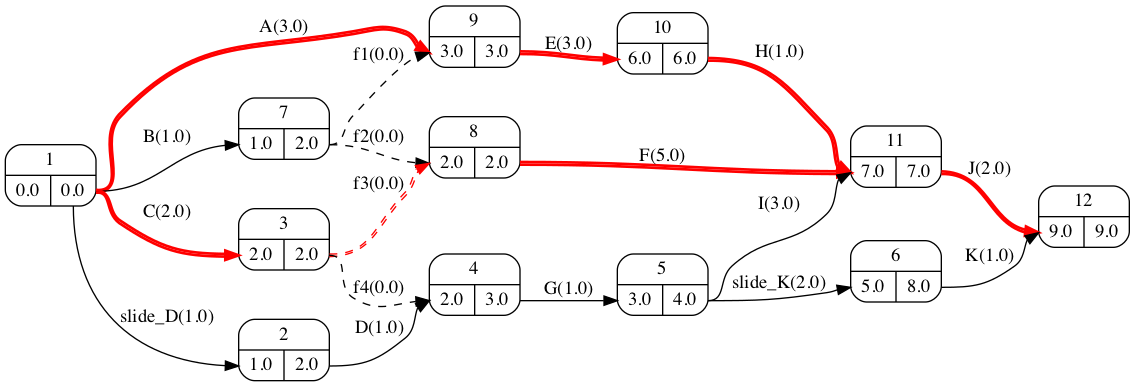

In [158]:
desplazamiento['proyecto'].pert(filename='pert_apartado_3.png',
                                duraciones=desplazamiento['duraciones'],
                                orientation='portrait', ranksep=0.5, nodesep=0.5)

In [159]:
desplazamiento['proyecto'].camino_critico(duraciones=desplazamiento['duraciones'])

Index(['A', 'C', 'E', 'f3', 'H', 'F', 'J'], dtype='object')

##### Actividades cuya holgura ha cambiado

In [160]:
( pd.DataFrame(dict(H_total_antes_de_la_asignacion=gantt_recursos.data.H_total,
                    H_total_despues_de_la_asignacion=nuevo_gantt.data.H_total))
  .drop(['Total', 'slide_D', 'slide_K'])
  .query('H_total_antes_de_la_asignacion != H_total_despues_de_la_asignacion')     
)

,H_total_antes_de_la_asignacion,H_total_despues_de_la_asignacion
D,2.0,1.0
K,5.0,3.0
